In [1]:
import torch, random
import torch.nn as nn
import torch.optim as optim
import torch 
import torch.nn as nn 
from torch.autograd import Variable 
import torch.utils.data as Data 
import torchvision 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import csv
import codecs
from sklearn.model_selection import cross_val_score,train_test_split

OSError: [WinError 1455] 页面文件太小，无法完成操作。 Error loading "C:\ProgramData\Anaconda3\lib\site-packages\torch\lib\cusolverMg64_11.dll" or one of its dependencies.

In [ ]:
df = pd.read_csv(r"C:\Users\dyy\Desktop\12.csv")

In [ ]:
def minmaxscaler(df):
    min = np.amin(df)
    max = np.amax(df)    
    return (df - min)/(max-min)

In [ ]:
X = df.values[:, 0:8]
Y = df.values[:, 8:229]

In [2]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

In [30]:
x_tra = torch.from_numpy(X_train)
x_tra = x_tra.float()
x_tes = torch.from_numpy(X_test)
x_tes = x_tes.float()
y_tra = torch.from_numpy(Y_train)
y_tra = y_tra.float()
y_tes = torch.from_numpy(Y_test)
y_tes = y_tes.float()

In [31]:
class RBFN(nn.Module):
    """
    以高斯核作为径向基函数
    """
    def __init__(self, centers, n_out=3):
        """
        :param centers: shape=[center_num,data_dim]
        :param n_out:
        """
        super(RBFN, self).__init__()
        self.n_out = n_out
        self.num_centers = centers.size(0) # 隐层节点的个数
        self.dim_centure = centers.size(1) # 
        self.centers = nn.Parameter(centers)
        # self.beta = nn.Parameter(torch.ones(1, self.num_centers), requires_grad=True)
        self.beta = torch.ones(1, self.num_centers)*10
        # 对线性层的输入节点数目进行了修改
        self.linear = nn.Linear(self.num_centers+self.dim_centure, self.n_out, bias=True)
        self.initialize_weights()# 创建对象时自动执行
 
 
    def kernel_fun(self, batches):
        n_input = batches.size(0)  # number of inputs
        A = self.centers.view(self.num_centers, -1).repeat(n_input, 1, 1)
        B = batches.view(n_input, -1).unsqueeze(1).repeat(1, self.num_centers, 1)
        C = torch.exp(-self.beta.mul((A - B).pow(2).sum(2, keepdim=False)))
        return C
 
    def forward(self, batches):
        radial_val = self.kernel_fun(batches)
        class_score = self.linear(torch.cat([batches, radial_val], dim=1))
        return class_score
 
    def initialize_weights(self, ):
        """
        网络权重初始化
        :return:
        """
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                m.weight.data.normal_(0, 0.02)
                m.bias.data.zero_()
            elif isinstance(m, nn.ConvTranspose2d):
                m.weight.data.normal_(0, 0.02)
                m.bias.data.zero_()
            elif isinstance(m, nn.Linear):
                m.weight.data.normal_(0, 0.02)
                m.bias.data.zero_()
 
    def print_network(self):
        num_params = 0
        for param in self.parameters():
            num_params += param.numel()
        print(self)
        print('Total number of parameters: %d' % num_params)


In [32]:
#lossData=[[]]
#model = RBFN()
#loss_func = nn.MSELoss()
#optim = torch.optim.SGD(model.parameters(), 0.0001)
#batch_size =64
#epochs = 100
#print("epoch\t loss\t")#
#losses = []

In [33]:
#for i in range(epochs):
#     batch_loss = []
#    # start和end分别是提取一个batch数据的起始和终止下标
#     for start in range(0, len(x_tra), batch_size):
#        end = start + batch_size if start + batch_size < len(x_tra) else len(x_tra)
#        xx = torch.tensor(x_tra[start:end], dtype = torch.float, requires_grad = False)
#        yy = torch.tensor(y_tra[start:end], dtype = torch.float, requires_grad = False)
#        predict = model(xx)
#        loss =loss_func(predict, yy)
#        optim.zero_grad()
#        loss.backward()
#        optim.step()
#        batch_loss.append(loss.data.numpy())
#    
#    # 每隔100步输出一下损失值（loss）
#     if i % 100==0:
#        losses.append(np.mean(batch_loss))
#        print(i, np.mean(batch_loss))

In [34]:
losses = []
if __name__ =="__main__":
    data = x_tra
    label = y_tra
    print(data.size())
    centers = data[0:1000,:]
    rbf = RBFN(centers,221)
    params = rbf.parameters()
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(params,lr=0.1,momentum=0.9)
    batch_loss = []
    for i in range(20000):
        
        optimizer.zero_grad()
 
        y = rbf.forward(data)
        loss = loss_fn(y,label)
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.data.numpy())
    
    # 每隔100步输出一下损失值（loss）
        if i % 100==0:
            losses.append(np.mean(batch_loss))
            print(i, np.mean(batch_loss))
    # 加载使用
  #  y = rbf.forward(data)
   # print(y.data)
   # print(label.data)


torch.Size([406, 8])
0 304.1343
100 17.133537
200 12.814334
300 11.29296
400 10.488705
500 9.983768
600 9.632152
700 9.368119
800 9.160061
900 8.989668
1000 8.846185
1100 8.722335
1200 8.613018
1300 8.514587
1400 8.425069
1500 8.342523
1600 8.265205
1700 8.190881
1800 8.119601
1900 8.052018
2000 7.9872017
2100 7.9251995
2200 7.8661056
2300 7.8098702
2400 7.7561846
2500 7.704711
2600 7.6551595
2700 7.6074314
2800 7.5614567
2900 7.5170913
3000 7.4741397
3100 7.4323645
3200 7.3916717
3300 7.352025
3400 7.3133917
3500 7.2757816
3600 7.239143
3700 7.2034407
3800 7.168642
3900 7.134676
4000 7.101524
4100 7.0689306
4200 7.0370426
4300 7.005863
4400 6.9753814
4500 6.9456043
4600 6.9165144
4700 6.888053
4800 6.8601017
4900 6.8324027
5000 6.804956
5100 6.7779555
5200 6.751392
5300 6.7251477
5400 6.6992702
5500 6.673775
5600 6.648646
5700 6.623863
5800 6.5993752
5900 6.575166
6000 6.5512896
6100 6.527731
6200 6.5044804
6300 6.4815245
6400 6.458783
6500 6.43622
6600 6.4139895
6700 6.392045
6800 6.

Text(0, 0.5, 'loss')

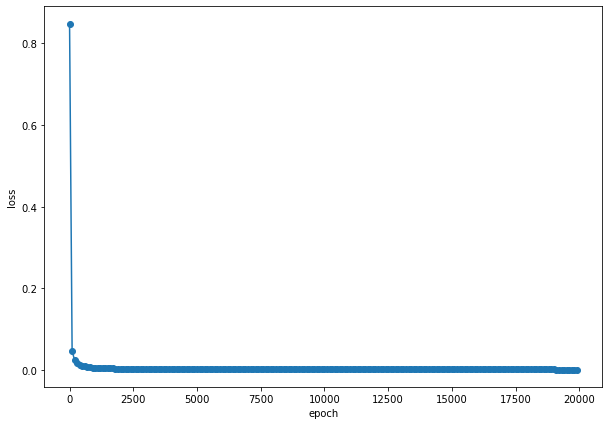

In [11]:
fig = plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(losses))*100,losses, 'o-')
plt.xlabel('epoch')
plt.ylabel('loss')

In [12]:
#test=pd.DataFrame(data=losses)
#test.to_csv('./loss_RBF.csv',encoding='gbk')

In [53]:
X_ver = X[291,]
Y_ver = Y[291,]

In [54]:
x_ver = torch.from_numpy(X_ver)
x_ver = x_ver.float()
y_ver = torch.from_numpy(Y_ver)
y_ver = y_ver.float()
x_ver=torch.unsqueeze(x_ver,0)

In [55]:
y = rbf.forward(x_ver)
y=torch.squeeze(y,0)
print(y.data)
print(y_ver.data)

tensor([ -4.4162,  -4.9482,  -5.5254,  -6.1549,  -6.8351,  -7.5688,  -8.3706,
         -9.2378, -10.1790, -11.2025, -12.3230, -13.5501, -14.9023, -16.4122,
        -18.1115, -20.0588, -22.3415, -25.1196, -28.7054, -32.8411, -33.9939,
        -33.1221, -31.0391, -29.0026, -27.4516, -26.3726, -25.6549, -25.2224,
        -25.0198, -25.0133, -25.1837, -25.5125, -25.9879, -26.5827, -27.1934,
        -27.7306, -28.1884, -28.3067, -28.0313, -27.3369, -26.0713, -24.7918,
        -23.5515, -22.4010, -21.3445, -20.3827, -19.4992, -18.6943, -17.9613,
        -17.2837, -16.6631, -16.0918, -15.5622, -15.0731, -14.6237, -14.2044,
        -13.8225, -13.4667, -13.1432, -12.8459, -12.5759, -12.3310, -12.1062,
        -11.9085, -11.7301, -11.5731, -11.4363, -11.3184, -11.2161, -11.1335,
        -11.0661, -11.0171, -10.9818, -10.9657, -10.9683, -10.9885, -11.0287,
        -11.0954, -11.1861, -11.3020, -11.4499, -11.6347, -11.8562, -12.1163,
        -12.4225, -12.7773, -13.1762, -13.6321, -14.1490, -14.72

Text(0, 0.5, 's11')

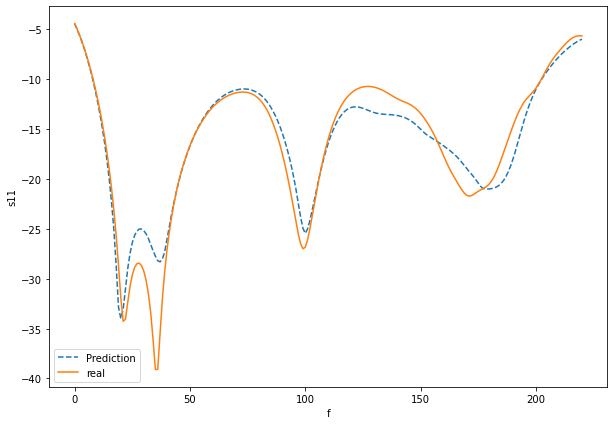

In [56]:
predicted1 = rbf.forward(x_ver)
predicted1 = predicted1.detach().numpy()
fig, ax = plt.subplots(figsize = (10, 7))
#plt.scatter(x_ver[: ,2],predicted1)
#plt.scatter(x_ver[: ,2],y_ver)
ax.plot(y.data, label='Prediction', linestyle = '--')
ax.plot(y_ver.data, label='real', linestyle = '-')
ax.legend()
ax.set_xlabel('f')
ax.set_ylabel('s11')
#print(predicted1)

In [48]:
test=pd.DataFrame(data=y.data)
test.to_csv('./RBF_predicted2.csv',encoding='gbk')